In [2]:
import numpy as np  
import pandas as pd  
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 

Задание № 0
Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

желаемая точность  Δ  = 3;
дисперсия  𝜎2  = 225;
уровень доверия  𝛽  = 0.95.
Ответ округлите до целого

In [4]:
z = 1 - (1-0.95)/2
z

0.975

In [38]:
n = round((z * 225**(1/2) / 3)**2)
n

24

Задание № 1
Постройте 98% доверительный интервал для среднего значения, если известно, что

объем выборки n = 25;
среднее значение по выборке  𝑥⎯⎯⎯  = 130;
Из достоверных источников известно стандартное отклонение  𝜎=15 .
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого

In [19]:
import scipy.stats as st
st.norm.ppf((1-0.98)/2)

-2.3263478740408408

In [20]:
a1 = 130 - 15/5 * (-2.33)
a1

136.99

In [21]:
a2 = 130 + 15/5 * (-2.33)
a2

123.01

In [22]:
round(a2 - a1)

-14

2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001
Задание № 2
Даны две выборки роста мужчин и женщин.

Докажите, используя t-Тест Стьдента, что различие между выборками незначительно, если уровень значимости равен  𝛼  = 0.001.
Покажите различия визуально

In [23]:
import scipy.stats as stats
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

In [24]:
from scipy import stats

In [26]:
t, p = stats.ttest_ind(mens, womens)
t, p

(3.6635841716708892, 0.00024875321033580573)

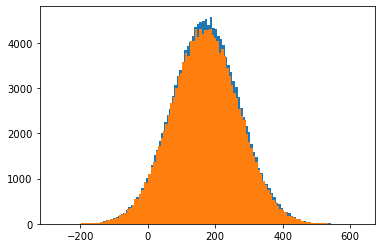

In [27]:
plt.hist(mens, bins=120); 
plt.hist(womens, bins=120); 

3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей.
Задание № 3
Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

стандартное отклонение  𝜎=150 ;
уровень доверия  𝛽  = 95%;
Погрешность  Δ=50  рублей.

In [33]:
z = 1-0.05/2
z

0.975

In [37]:
n = round((z * 150 / 50)**2)
n

9

Задание № 4
Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за 0.05 ( 𝛼=0.05 ).

In [39]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [41]:
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact(observations)
oddsratio, pvalue 

(0.5811965811965812, 0.35417955365927367)

p-value > 0.05 => он не умеет предсказывать

Задание № 5
Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия  𝛽=90%  для выборки:

In [43]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [51]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [53]:
mean_confidence_interval(data, confidence = 0.90)

(6.628571428571429, 6.07363110319857, 7.183511753944288)

Задание № 6
Принадлежат ли выборки A и B одному множеству?

Оцените это с помощью известных вам тестов для проверок статистических гипотез;
Покажите различия визуально.

In [55]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]
 

In [56]:
t, p = stats.ttest_ind(A, B)
t, p

(11.865233896372924, 4.623319592204015e-25)

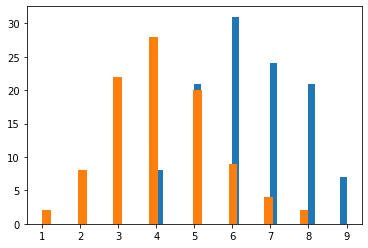

In [58]:
plt.hist(A, bins=30); 
plt.hist(B, bins=30); 

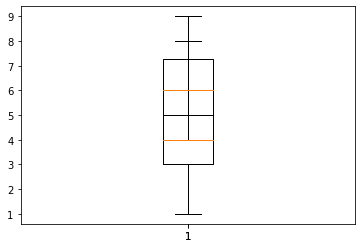

In [68]:
plt.boxplot(A);
plt.boxplot(B);

не принадлежат

Задание № 7 (задание без подвоха)
На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.

Предположим, Вы сформировали две гипотезы:
нулевая гипотеза - распределение нормальное;
альтернативная гипотеза - распределение ненормальное.
допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости p-value = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)

смотря, какой доверительный интервал мы допускаем. с чем сравнить p-value?

Задание № 8
Первая выборка — это пациенты, которых лечили препаратом А. Вторая выборка — пациенты, которых лечили препаратом B.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)

Требуется выяснить, имеется ли значимое различие эффективности препаратов А и B, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики? (уровень значимости принять за 0.05 (5%))

При каком минимальном p-value различия были бы уже значимы?

Если выборки незначительно отличаются, то продемонстрируйте это визуально

In [79]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

In [80]:
t, p = stats.ttest_ind(A, B)
t, p

(-1.95300880485141, 0.051284593140469285)

p-value > 0.05 =>  не имеется значимое различие эффективности препаратов А и B

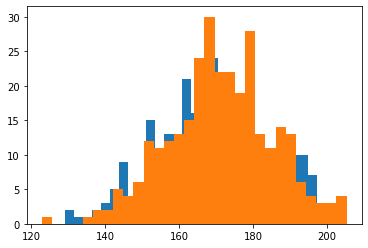

In [75]:
plt.hist(A, bins=30); 
plt.hist(B, bins=30); 